# Análise de Dados sobre os campeões de League of Legends

### Projeto desenvolvido para estudo estatístico

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Função para o processamento dos dados númericos e strings dos dataset
class DataProcessor:
    def __init__(self, data):
        self.data = data
        
    def get_numeric_data(self):
        numeric_data = self.data.select_dtypes(include = ['number'])
        return numeric_data
    
    def get_string_data(self):
        string_data = self.data.select_dtypes(include = ['object'])
        return string_data

### Lendo o dataset e tratando os dados

In [3]:
#Lendo o dataset
df = pd.read_csv("dados/LOL.csv")
df.head()

,ID,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Demage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range
0,0,Aatrox,Fighter,Top,650,0,3.0,0,60,38,32,65,345,175
1,1,Ahri,Mage,Mid,570,418,2.0,8,53,18,30,66,330,550
2,2,Akali,Assassin,Mid,570,200,9.0,0,62,23,37,62,345,125
3,3,Akshan,Marksman,Mid,630,350,4.0,7,52,26,30,63,330,500
4,4,Alistar,Tank,Support,670,350,8.0,8,62,44,32,62,330,125


In [4]:
df.dtypes

ID                    int64
Champion_Name        object
Primary_Role         object
Primary_Location     object
Health                int64
Mana                  int64
Health_Regen        float64
Mana_Regen            int64
Attack_Demage         int64
Armor                 int64
Magic_Resistance      int64
Attack_Speed          int64
Movement_Speed        int64
Range                 int64
dtype: object

In [5]:
#renomeando a coluna "Attack_Demage" para "Attack_Damage"
df.rename(columns = {"Attack_Demage": "Attack_Damage"}, inplace = True)
df.head()

,ID,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Damage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range
0,0,Aatrox,Fighter,Top,650,0,3.0,0,60,38,32,65,345,175
1,1,Ahri,Mage,Mid,570,418,2.0,8,53,18,30,66,330,550
2,2,Akali,Assassin,Mid,570,200,9.0,0,62,23,37,62,345,125
3,3,Akshan,Marksman,Mid,630,350,4.0,7,52,26,30,63,330,500
4,4,Alistar,Tank,Support,670,350,8.0,8,62,44,32,62,330,125


In [6]:
#Removendo a coluna ID
# Modificar o DataFrame original
df.drop(columns=['ID'], inplace=True)
df

,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Damage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range
0,Aatrox,Fighter,Top,650,0,3.0,0,60,38,32,65,345,175
1,Ahri,Mage,Mid,570,418,2.0,8,53,18,30,66,330,550
2,Akali,Assassin,Mid,570,200,9.0,0,62,23,37,62,345,125
3,Akshan,Marksman,Mid,630,350,4.0,7,52,26,30,63,330,500
4,Alistar,Tank,Support,670,350,8.0,8,62,44,32,62,330,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Zeri,Marksman,bottom,600,250,3.0,8,50,20,30,66,325,500
157,Ziggs,Mage,Mid,606,480,6.0,8,54,22,30,62,325,550
158,Zilean,Support,Support,574,452,5.0,8,52,24,30,62,335,550
159,Zoe,Mage,Mid,630,425,6.0,6,58,21,30,62,340,550


In [7]:
#Verificando se não possui campeões repetidos
df['Champion_Name'].nunique()

161

In [8]:
#Verificando se o dataset possui valores nulos
print(df.isnull().sum())

Champion_Name       0
Primary_Role        0
Primary_Location    0
Health              0
Mana                0
Health_Regen        1
Mana_Regen          0
Attack_Damage       0
Armor               0
Magic_Resistance    0
Attack_Speed        0
Movement_Speed      0
Range               0
dtype: int64


In [9]:
#Tratando a coluna "Health_Regen" com a imputação de dados do valor nulo pela mediana
df["Health_Regen"] = df.groupby(["Primary_Role", "Primary_Location"])["Health_Regen"].transform(lambda x: x.fillna(x.median()))

In [10]:
df[df.isnull().any(axis=1)]

,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Damage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range


In [11]:
#A coluna "Primary_Location" possui valores iguais escritos de forma diferente
df["Primary_Location"].unique()

array(['Top', 'Mid', 'Support', 'Jungle', 'bottom', 'Bottom'],
      dtype=object)

In [12]:
#Capitalizando todas as strings de cada coluna do tipo object, para padronização
texto_colunas = df.select_dtypes(include = ["object"]).columns
df[texto_colunas] = df[texto_colunas].apply(lambda x: x.str.capitalize())

In [13]:
df["Primary_Location"].unique()

array(['Top', 'Mid', 'Support', 'Jungle', 'Bottom'], dtype=object)

### Análise descretiva dos dados usando a função describe() 

In [14]:
df.describe()

,Health,Mana,Health_Regen,Mana_Regen,Attack_Damage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,621.788820,310.608696,6.680124,5.136646,59.068323,29.683230,32.708075,64.565217,335.795031,329.378882
std,39.391689,123.053300,5.748791,2.866829,5.833228,6.591114,22.927505,3.936659,8.205271,192.592314
min,410.000000,0.000000,1.000000,0.000000,40.000000,17.000000,22.000000,47.000000,285.000000,125.000000
25%,600.000000,280.000000,5.000000,4.000000,55.000000,25.000000,30.000000,62.000000,330.000000,125.000000
50%,630.000000,330.000000,6.000000,6.000000,60.000000,29.000000,32.000000,64.000000,335.000000,200.000000
75%,650.000000,375.000000,8.000000,8.000000,63.000000,34.000000,32.000000,66.000000,340.000000,525.000000
max,696.000000,500.000000,55.000000,9.000000,72.000000,47.000000,321.000000,85.000000,355.000000,650.000000


### Análise de correlação dos dados

<AxesSubplot:>

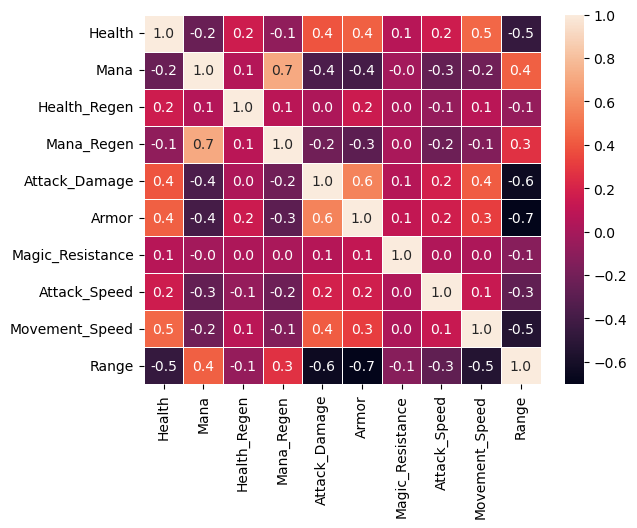

In [15]:
data = DataProcessor(df)
df_numerico = data.get_numeric_data()
matrix_corr = df_numerico.corr()
plot = sns.heatmap(matrix_corr, annot = True, fmt=".1f", linewidths=.6)
plot

#### Algumas conclusões podem ser tiradas:
#### - Mana_Regen e Mana possuem uma correlação moderada positiva de 0.7, indicando que campeões com maior quantidade de "Mana" recuperam mana mais rapidamente.
#### - Armor e Attack_Damage possuem uma correlação moderada possitiva de 0.6, que indica que campeões com maior dano de ataque possuem mais armadura.
#### - Attack_Damage e Range possuem uma correlação moderada negativa, mostra que campeões com maior alcance de ataque possuem menor dano de ataque em relação com campeões com menor alcance ou corpor-a-corpo.
#### - Armor e Range possuem uma correlação moderada negativa, demonstrando que campeões com menor alcance de ataque têm mais armadura e os que possuem maior alcance de ataque possuem menos armadura

## Regresão Linear 

In [16]:
x = df[["Attack_Damage", "Armor", "Magic_Resistance"]]
y = df["Mana"]

reg = LinearRegression()
reg.fit(x, y)

coeficientes = reg.coef_
interceptador = reg.intercept_
print("Coeficientes:", coeficientes)
print("Interceptador:", interceptador)

Coeficientes: [-4.37941189 -5.20628349  0.16346284]
Interceptador: 718.4859657572183


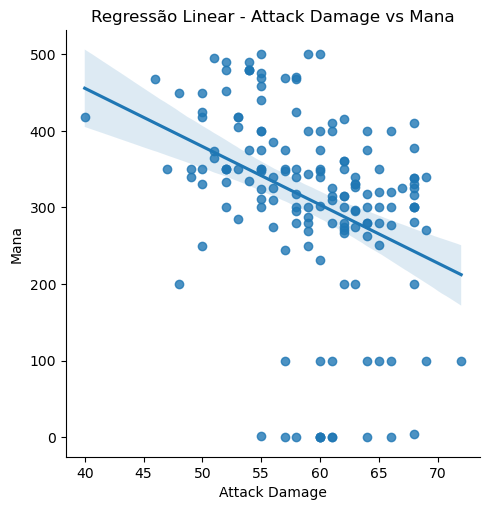

In [18]:
sns.lmplot(x = "Attack_Damage", y = "Mana", data = df)
plt.title("Regressão Linear - Attack Damage vs Mana")
plt.xlabel("Attack Damage")
plt.ylabel("Mana")
plt.show()

#### Análise:
#### O objetivo é enteder a relação entre as variáveis e fazer previsões de Mana com base nos valores das variáveis independentes (Attack_Damage, Armor, Magic_Resistance). Pra cada unidade de aumento em Attack_Damage, espera-se uma diminuição de -4.37941189 unidades de Mana. Da mesma forma, para cada unidade de aumento de Armor, espera-se uma diminuição de -5.20628349 unidades de Mana, e para cada unidade de aumento em Magic_Resistance, espera-se um aumento de 0.16346284 unidades de Mana.

## Análise de frequência e proporção

Role contadas: 
Fighter     43
Mage        35
Marksman    27
Tank        22
Assassin    18
Support     16
Name: Primary_Role, dtype: int64

Locais primários contados: 
Top        40
Mid        38
Jungle     33
Support    29
Bottom     21
Name: Primary_Location, dtype: int64

Proporção de Role:
Fighter     26.71%
Mage        21.74%
Marksman    16.77%
Tank        13.66%
Assassin    11.18%
Support      9.94%
Name: Primary_Role, dtype: object

Proporção de Local primário:
Top        24.84%
Mid         23.6%
Jungle      20.5%
Support    18.01%
Bottom     13.04%
Name: Primary_Location, dtype: object


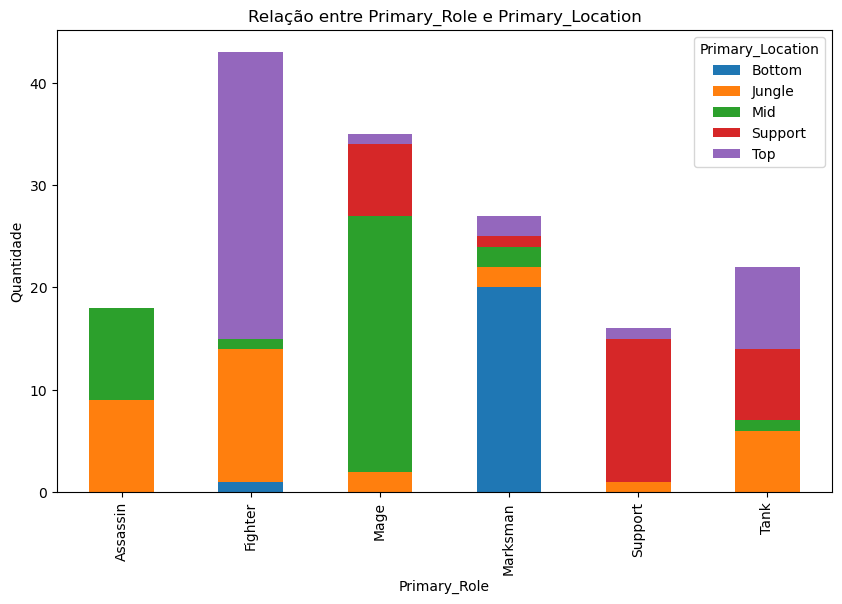

In [22]:
role_cont = df["Primary_Role"].value_counts()
location_cont = df["Primary_Location"].value_counts()

role_proportions = df["Primary_Role"].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
location_proportions = df["Primary_Location"].value_counts(normalize = True).mul(100).round(2).astype(str) + '%'

print(f'Role contadas: \n{role_cont}')
print(f'\nLocais primários contados: \n{location_cont}')
print(f'\nProporção de Role:\n{role_proportions}')
print(f'\nProporção de Local primário:\n{location_proportions}')

#tabela cruzada entre Primary_Role e Primary_Location
cross_tab = pd.crosstab(df["Primary_Role"], df["Primary_Location"])

cross_tab.plot(kind = "bar", stacked = True, figsize = (10,6))
plt.title("Relação entre Primary_Role e Primary_Location")
plt.xlabel("Primary_Role")
plt.ylabel("Quantidade")
plt.legend(title = "Primary_Location")
plt.show()

#### Análise:
#### Como é possível observar, campeões com classe primária "Assassin" (Assassino) possuem como rota primária "Jungle" (Selva) ou "Mid" (Rota do Meio). Os campeões da classe "Fighter" (Lutador) predominantemente ocupam a rota "Top" (Rota do Topo), com alguns desempenhando a função da Selva. Os campeões da classe "Mage" (Mago) em sua maioria ocupa a rota do Meio. Já os campeões da classe "Marksman" (Atirador) possuem como rota primária "Bottom" (rota de Baixo), que divivem com a classe "Support" (Suporte). Os campeões da classe "Tank" (Tanque) que ocupam a rota do Topo, a selva e a rota de Baixo desempenhando a função de Suporte.